### Exploring Our Data

### We are going to use our 2018 data set instead 

In [1]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc

#import xgboost as xgb
import collections
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn import tree
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
df_2018 = pd.read_csv('kickstarter-projects/ks-projects-201801.csv', encoding ='iso-8859-1')

In [3]:
df_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
#Detects the live in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='live']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='undefined']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='canceled']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='suspended']

#Detects the undefined in usd pledged and drops them 
df_2018 = df_2018.loc[~df_2018['usd pledged'].isna(), :]

#Detects the undefined in usd pledged and drops them 
df_2018 = df_2018.loc[~df_2018['name'].isna(), :]

In [6]:
df_2018['launched_datetime'] = pd.to_datetime(df_2018['launched'])
df_2018['deadline_datetime'] = pd.to_datetime(df_2018['deadline'])
df_2018['project_times'] = pd.to_datetime(df_2018['deadline']) - pd.to_datetime(df_2018['launched'])
'''This extracts the project days from the total project time'''
df_2018['project_length'] = df_2018.project_times.dt.days


In [7]:
df_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_datetime,deadline_datetime,project_times,project_length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,2015-08-11 12:12:28,2015-10-09,58 days 11:47:32,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,2017-09-02 04:43:57,2017-11-01,59 days 19:16:03,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,2013-01-12 00:20:50,2013-02-26,44 days 23:39:10,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,2012-03-17 03:24:11,2012-04-16,29 days 20:35:49,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016-02-26 13:38:27,2016-04-01,34 days 10:21:33,34
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014-12-01 18:30:44,2014-12-21,19 days 05:29:16,19
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,2016-02-01 20:05:12,2016-03-17,44 days 03:54:48,44
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0.00,2406.39,2013-09-09 18:19:37,2013-10-09,29 days 05:40:23,29
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00,2013-03-09 06:42:58,2013-04-08,29 days 17:17:02,29
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,failed,0,US,0.00,0.00,5000.00,2014-09-02 17:11:50,2014-10-02,29 days 06:48:10,29


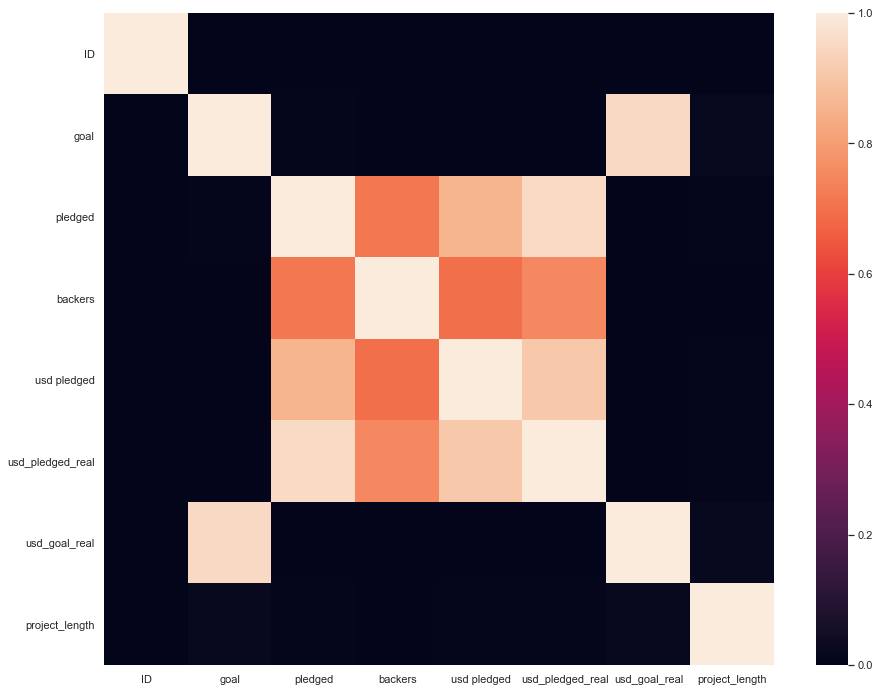

In [8]:
sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(df_2018.corr());

In [9]:
df_2018.category.value_counts()

Product Design       18679
Documentary          14523
Music                12485
Tabletop Games       11744
Shorts               11394
Food                 10416
Video Games           9327
Film & Video          8601
Fiction               8108
Fashion               7529
Art                   7486
Nonfiction            7414
Theater               6684
Rock                  6246
Children's Books      6198
Apparel               6165
Technology            5723
Indie Rock            5329
Apps                  5287
Photography           5246
Webseries             5148
Publishing            5020
Narrative Film        4617
Comics                4581
Web                   4309
Country & Folk        4213
Crafts                4152
Design                3547
Hip-Hop               3459
Hardware              3114
                     ...  
Blues                  234
Animals                229
Couture                227
Fabrication Tools      215
Makerspaces            208
Movie Theaters         201
P

## What features do we truly care about?
- main_category: there are too many categories in the sub-categories, and are subsets of the same things.

In [ ]:
 train_test_split(df_2018.drop("state", axis=1),
                                df_2018["state"],                                                 
target = new_pitches['pitch_type']
predictors = new_pitches.drop(['pitch_type'], axis=1).copy()

In [ ]:
numeric_features = list(predictors.select_dtypes(exclude='object'))
numeric_transformer = Pipeline(steps=[('keeper', None)])


In [ ]:
cat_features = list(predictors.select_dtypes(include='object'))
cat_transfomer = Pipeline(steps=[('onehot', OneHotEncoder())])

In [10]:
encoder = OneHotEncoder(drop='first', categories="auto")
encoder.fit(df_2018[["country", "main_category"]])


OneHotEncoder(categorical_features=None, categories='auto', drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [11]:
ohe = pd.DataFrame(encoder.transform(df_2018[["country", "main_category"]]).toarray(),
                   columns=encoder.get_feature_names(["country", "main_category"]))
ohe.shape

(331462, 35)

In [ ]:
# sns.set(rc={'figure.figsize': (15,12)})
# sns.heatmap(ohe.corr());

In [12]:
ohe.head()

,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_2018_2 = df_2018.drop(["category",'goal','ID','country', "launched_datetime",'deadline_datetime',"main_category", "name",
                       "currency", "launched", 'project_times',"backers", "pledged", "usd_pledged_real",
                       "usd pledged", "deadline"], axis=1)

In [14]:
df_2018_2.T

,0,1,2,3,5,6,7,10,11,12,...,378649,378650,378651,378652,378653,378654,378657,378658,378659,378660
state,failed,failed,failed,failed,successful,successful,failed,failed,successful,failed,...,failed,failed,successful,successful,failed,failed,failed,failed,failed,failed
usd_goal_real,1533.95,30000,45000,5000,50000,1000,25000,2406.39,12500,5000,...,500,6000,4529.81,2675.19,1700,6500,1500,15000,15000,2000
project_length,58,59,44,29,34,19,44,29,29,29,...,59,37,29,29,29,29,26,45,30,27


In [15]:
df_2018_2.state = df_2018_2.state.replace('successful', 1)
df_2018_2.state = df_2018_2.state.replace('failed', 0)

# y_testcf = y_test.replace('successful', 1)
# y_testcf = y_test.replace('failed', 0)

In [16]:
df_2018_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 3 columns):
state             331462 non-null int64
usd_goal_real     331462 non-null float64
project_length    331462 non-null int64
dtypes: float64(1), int64(2)
memory usage: 20.1 MB


In [17]:
df_2018_2 = df_2018_2.reset_index(drop=True)

In [18]:
df_2018_concat = pd.concat(objs=[df_2018_2, ohe], axis=1)

In [19]:
df_2018_concat.head().T

,0,1,2,3,4
state,0.00,0.0,0.0,0.0,1.0
usd_goal_real,1533.95,30000.0,45000.0,5000.0,50000.0
project_length,58.00,59.0,44.0,29.0,34.0
country_AU,0.00,0.0,0.0,0.0,0.0
country_BE,0.00,0.0,0.0,0.0,0.0
country_CA,0.00,0.0,0.0,0.0,0.0
country_CH,0.00,0.0,0.0,0.0,0.0
country_DE,0.00,0.0,0.0,0.0,0.0
country_DK,0.00,0.0,0.0,0.0,0.0
country_ES,0.00,0.0,0.0,0.0,0.0


In [20]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df_2018_concat)

In [22]:
scaled_df = pd.DataFrame(data=scaled_data)

In [23]:
# scaled_df.isna().sum #check to see no nans

In [24]:
pca = PCA(n_components=2)
#pca_data = pca.fit_transform(scaled_df)
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_data, columns=['pca1','pca2'])

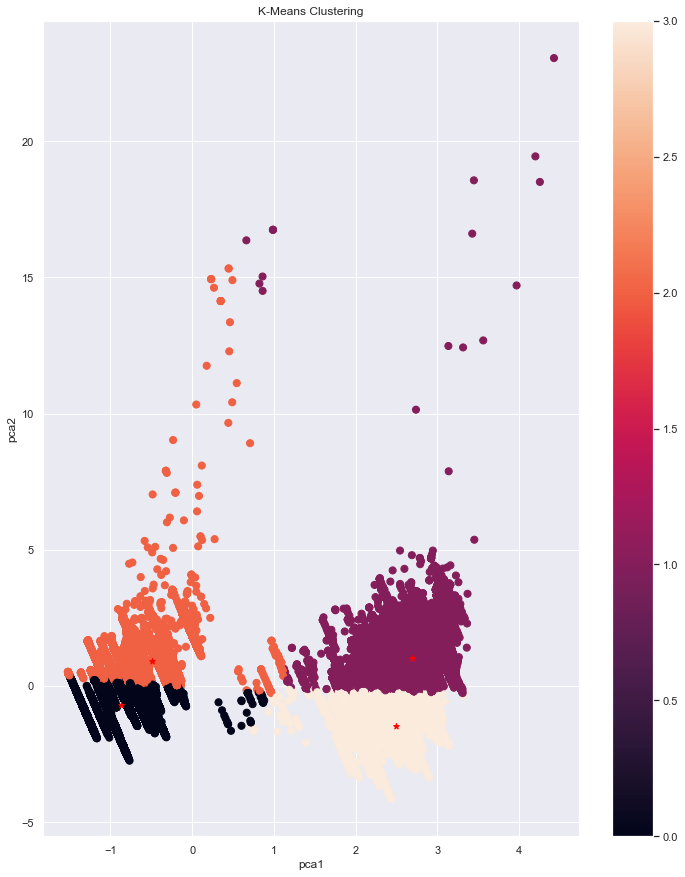

In [29]:
model= KMeans(n_clusters=4, random_state=2019).fit(pca_df)
model_label = model.labels_
model_centers= model.cluster_centers_

fig = plt.figure(figsize=(12,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(pca_df['pca1'],pca_df['pca2'],
                    c=model_label,s=50)
ax.set_title("K-Means Clustering")
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0],model_centers[:,1],c='red',marker='*')



In [30]:
pca_component_df = pd.DataFrame(pca.components_)

In [31]:
pca_component_df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.117831,0.011223,-0.049218,0.195404,0.053489,0.261769,0.060465,0.142293,0.069211,0.107114,...,0.067205,-0.082031,-0.019906,0.098574,0.022535,-0.168931,0.034028,-0.021112,0.150040,-0.015913
1,-0.563413,0.142314,0.337358,0.017037,0.063426,0.045268,0.090802,0.089259,-0.007198,0.067847,...,0.117796,-0.136806,0.172040,-0.124389,0.106538,-0.161549,-0.032221,0.114720,0.387617,-0.230415


In [32]:
pca_c_df = pca_component_df.T 

In [33]:
pca_c_df.columns = ['pca1','pca2']


In [34]:
pca_c_df.head()

,pca1,pca2
0,-0.117831,-0.563413
1,0.011223,0.142314
2,-0.049218,0.337358
3,0.195404,0.017037
4,0.053489,0.063426


In [35]:
pca_c_df['pca1'].sort_values(ascending=False).head(5)

11    0.426554
5     0.261769
3     0.195404
36    0.150040
7     0.142293
Name: pca1, dtype: float64

In [36]:
pca_c_df['pca2'].sort_values(ascending=False).head(5)

36    0.387617
2     0.337358
30    0.172040
1     0.142314
14    0.122319
Name: pca2, dtype: float64

In [41]:
pca.explained_variance_

array([1.90319917, 1.29627037])

In [38]:
pca2= PCA(.90)
pca2.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pca2.n_components_

32

In [40]:
df_2018_concat.shape

(331462, 38)

In [ ]:
np.sort(pca.components_[0])

In [ ]:
for pca in pca.components_:
    print(np.amax(pca),np.argmax(pca))
    

In [ ]:
np.amax(pca.components_[0]),np.argmax(pca.components_[0])

In [ ]:
def max(arr):
    max_ = arr[0]
    for item in arr:
        if item > max_:
            max_ = item
    return max_  

In [ ]:
sorted(list(pca.components_[0]),reverse=True)

In [ ]:
pca.components_[0]

In [ ]:
sorted(list(pca.components_[1]),reverse=True)

In [ ]:
pca.components_[1]

In [ ]:
df_2018_concat.head()

In [ ]:
predictors, target = (df_2018_concat.drop("state", axis=1),df_2018_concat["state"])

In [ ]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100, max_depth=5), 
               GradientBoostingClassifier(n_estimators=100), xgb.XGBClassifier()]

## One Hot Encoding

In [ ]:



encoder = OneHotEncoder(drop='first', categories="auto")
encoder.fit(X_train[["category", "main_category", "country"]])



In [ ]:
encoder.categories_

In [ ]:
ohe = pd.DataFrame(encoder.transform(X_train[["category", "main_category", "country"]]).toarray(),
                   columns=encoder.get_feature_names(["category", "main_category", "country"]))
ohe.head()

#### Now make a Decision Tree Classifier

In [ ]:
X_train2.head()

In [ ]:
X_train2.shape

In [ ]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_train2, y_train)

In [ ]:
# # Create DOT data
# dot_data = tree.export_graphviz(clf, 
#                                 out_file=None, 
#                                 feature_names=X_train2.columns,  
#                                 class_names=["failed", "successful"])

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

## How well did our model do? 

In [ ]:
X_test.head()

In [ ]:
encoder2 = OneHotEncoder(drop='first', categories="auto")
encoder2.fit(X_test[["category", "main_category", "country"]])

In [ ]:
ohe = pd.DataFrame(encoder.transform(X_test[["category", "main_category", "country"]]).toarray(),
                   columns=encoder.get_feature_names(["category", "main_category", "country"]))
ohe.head()

In [ ]:
X_test = X_test.reset_index(drop=True)

In [ ]:
X_test['launched_datetime'] = pd.to_datetime(X_test['launched'])
X_test['deadline_datetime'] = pd.to_datetime(X_test['deadline'])
X_test['project_times'] = pd.to_datetime(X_test['deadline']) - pd.to_datetime(X_test['launched'])
'''This extracts the project days from the total project time'''
X_test['project_length'] = X_test.project_times.dt.days

In [ ]:
X_test = X_test.drop(["category", "launched_datetime",'deadline_datetime',"main_category", "country", "name",
                       "currency", "launched", 'project_times',"backers", "pledged", "usd_pledged_real",
                       "usd pledged", "deadline"], axis=1)

In [ ]:
X_test2 = pd.concat(objs=[X_test, ohe], axis=1)

In [ ]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_test2, y_test)

In [ ]:
# # Create DOT data
# dot_data = tree.export_graphviz(clf, 
#                                 out_file=None, 
#                                 feature_names=X_test2.columns,  
#                                 class_names=["failed", "successful"])

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

In [ ]:
y_pred = clf.predict(X_test2)

In [ ]:
y_pred = pd.Series(y_pred)

In [ ]:
 y_traincf = y_train.replace('successful', 1)
y_traincf = y_train.replace('failed', 0)

y_testcf = y_test.replace('successful', 1)
y_testcf = y_test.replace('failed', 0)

y_predcf = y_pred.replace('successful', 1)
y_predcf = y_pred.replace('failed', 0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))


# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_testcf, y_predcf, rownames=['True'], colnames=['Predicted'], margins=True)




## Model 2

lets run different models!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, p=100)
knn.fit(X_train2, y_train)

In [ ]:
# Takes in a model, trains the model,
#and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train2, y_train)
    
    # Make predictions and evalute
    y_pred = model.predict(X_test2)
    
    # Calculate Accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print("Accuracy is :{0}".format(acc))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("\nAUC is :{0}".format(round(roc_auc,2)))

    #convert ys into bools for confusion matrix
    y_pred = model.predict(X_test2)
    y_pred = pd.Series(y_pred)

    y_trainbool = y_train.replace('successful', 1)
    y_trainbool = y_train.replace('failed', 0)

    y_testbool = y_test.replace('successful', 1)
    y_testbool = y_test.replace('failed', 0)

    y_predbool = y_pred.replace('successful', 1)
    y_predbool = y_pred.replace('failed', 0)

    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    pd.crosstab(y_testbool, y_predbool, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)
fit_and_evaluate(clf)

In [ ]:
lr = LogisticRegression()

In [ ]:
gradient_boosted = GradientBoostingClassifier(random_state=2019)

In [ ]:
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train2, y_train)
    
    # Make predictions and evalute
    predictions = model.predict(X_test2)
    
    # Return the performance metric
    return print(classification_report(y_test, predictions), '\n', confusion_matrix(y_test, predictions))

In [ ]:
lr = LogisticRegression()

In [ ]:
gradient_boosted = GradientBoostingClassifier(random_state=60)

fit_and_evaluate(gradient_boosted)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

fit_and_evaluate(knn)

In [ ]:
fit_and_evaluate(lr)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

fit_and_evaluate(knn)

In [ ]:
gradient_boosted = GradientBoostingClassifier(random_state=2019)

fit_and_evaluate(gradient_boosted)



In [ ]:
fit_and_evaluate(clf)
